In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import math
from fastkde import fastKDE
from tqdm import tqdm
from scipy import integrate

In [2]:
vid_train_path = r'../data/commaai/destination/'
all_value_files = glob.glob(os.path.join(vid_train_path, "*.value")) 

In [47]:
all_angles = np.array(0)
for filename_yaw in all_value_files:
    angles = np.load(filename_yaw)
    all_angles = np.append(all_angles, angles)

In [ ]:
# drop angles lower and higher than 180 degrees

In [48]:
all_angles = all_angles[abs(all_angles) < 90 ]

In [71]:
density_path = '../data/commaai/density/'
outfile = str(density_path + 'fastkde_density.csv')

In [50]:
myPDF,axes = fastKDE.pdf(all_angles, numPoints= 2**15 + 1)

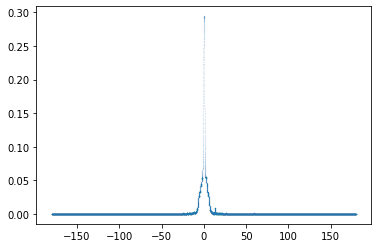

In [51]:
plt.scatter(axes, myPDF, s = 0.01, alpha = 0.5)

In [61]:
density = pd.DataFrame({'pdf': myPDF , 'axes': axes})

In [62]:
density = density.loc[abs(density['axes']) > 90]

In [67]:
density = pd.DataFrame({'pdf': myPDF , 'axes': axes})
# compute cdf
all_integrals = []
integral_before = 0
for i in tqdm(range(1,density.shape[0])):
    integral_now = integrate.trapz(density.loc[i-1:i,'pdf'] , density.loc[i-1:i, 'axes'])
    integral_now += integral_before
    integral_before = integral_now
    all_integrals.append(integral_now)
density.loc[1:,'cdf'] = all_integrals
density.loc[0,'cdf'] = 0

100%|██████████| 32768/32768 [00:13<00:00, 2359.51it/s]


In [72]:
density.to_csv(outfile, index=False)